<a href="https://colab.research.google.com/github/shawn-kg/DataMining/blob/main/assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assign 1: Data Exploration
Shawn George

# Mean and Total Variance

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./OnlineNewsPopularity.csv')
data = data.drop(data.columns[[0,1,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]], axis=1)
data.head()
# nArray = data.to_numpy()

# print(nArray.shape[1]);
# print(nArray.shape[0]);
means = np.mean(data, axis=0);
print("Mean Vector:")
print(means)
xHat = data-means;
# print(xHat)
xNorm = 0;
for j in xHat.values:
  xNorm+= (np.dot(j.transpose(),j))
totalVariance = xNorm/data.shape[0];
print("Total Variance:")
print(totalVariance)




Mean Vector:
 n_tokens_title                    10.398749
 n_tokens_content                 546.514731
 n_unique_tokens                    0.548216
 n_non_stop_words                   0.996469
 n_non_stop_unique_tokens           0.689175
 num_hrefs                         10.883690
 num_self_hrefs                     3.293638
 num_imgs                           4.544143
 num_videos                         1.249874
 average_token_length               4.548239
 num_keywords                       7.223767
 LDA_00                             0.184599
 LDA_01                             0.141256
 LDA_02                             0.216321
 LDA_03                             0.223770
 LDA_04                             0.234029
 global_subjectivity                0.443370
 global_sentiment_polarity          0.119309
 global_rate_positive_words         0.039625
 global_rate_negative_words         0.016612
 rate_positive_words                0.682150
 rate_negative_words                0.2879

# Covariance Matrix (inner and outer product form)

In [ ]:
innerCovMatrix = np.dot(np.transpose(xHat),xHat)/data.shape[0]
print("Inner Product Covariance Matrix")
print(innerCovMatrix)
print(innerCovMatrix.shape)
outerCovMatrix = np.zeros((data.shape[1],data.shape[1]))
for k in xHat.values:
  outerCovMatrix += k*k
outerCovMatrix = outerCovMatrix/data.shape[0];
print("Outer Product Covariance Matrix")
print(outerCovMatrix)
print(outerCovMatrix.shape)



Inner Product Covariance Matrix
[[ 4.46903889e+00  1.80854387e+01 -3.95820555e-02 ... -5.86494607e-02
   1.93982451e-02  2.15881875e+02]
 [ 1.80854387e+01  2.21936686e+05 -7.85621983e+00 ...  6.34662705e-01
   1.43271448e+00  1.34688547e+04]
 [-3.95820555e-02 -7.85621983e+00  1.23950745e+01 ... -6.14309369e-03
  -3.35931915e-03  3.30070096e+01]
 ...
 [-5.86494607e-02  6.34662705e-01 -6.14309369e-03 ...  3.56410689e-02
  -1.71000855e-02  3.25079931e+00]
 [ 1.93982451e-02  1.43271448e+00 -3.35931915e-03 ... -1.71000855e-02
   5.12077722e-02  7.13940172e+01]
 [ 2.15881875e+02  1.34688547e+04  3.30070096e+01 ...  3.25079931e+00
   7.13940172e+01  1.35182574e+08]]
(33, 33)
Outer Product Covariance Matrix
[[4.46903889e+00 2.21936686e+05 1.23950745e+01 ... 3.56410689e-02
  5.12077722e-02 1.35182574e+08]
 [4.46903889e+00 2.21936686e+05 1.23950745e+01 ... 3.56410689e-02
  5.12077722e-02 1.35182574e+08]
 [4.46903889e+00 2.21936686e+05 1.23950745e+01 ... 3.56410689e-02
  5.12077722e-02 1.35182574

# Correlation matrix as pairwise cosines

In [ ]:
from tables.utils import math
from numpy import linalg as la

corr = np.zeros((xHat.shape[1],xHat.shape[1]))
maxi = -100.0
mini = 100.0
leastCorr = 100.0
leastCorrAct = 0
maxCol = ("","")
maxColInd = (0,0)
minCol = ("","")
minColInd = (0,0)
leastCorrCol = ("","")
leastColInd = (0,0)
for i in range(0,xHat.shape[1]):
  for j in range(0,xHat.shape[1]):
    Ai = xHat.iloc[:,i];
    AiNorm = math.sqrt(np.dot(Ai.transpose(),Ai));
    Aj = xHat.iloc[:,j];
    AjNorm = math.sqrt(np.dot(Aj.transpose(),Aj));
    AiVal = Ai/AiNorm;
    AjVal = Aj/AjNorm;
    val = np.dot(AiVal.transpose(),AjVal);
    corr[i][j] = val;
    if (i!=j):
      if (val>maxi):
        maxi = val
        maxCol = (xHat.columns[i], xHat.columns[j]) 
        maxColInd = (i,j)
      if (val<mini):
        mini = val
        minCol = (xHat.columns[i], xHat.columns[j])
        minColInd = (i,j)
      if (abs(val)<leastCorr):
        leastCorr = abs(val);
        leastCorrAct = val;
        leastCorrCol = (xHat.columns[i],xHat.columns[j])
        leastColInd = (i,j)

print("Correlation Matrix")
print(corr)

print("Most Correlated")
print(maxi)

print("Most Correlated Columns and Indexes")
print(maxCol)
print(maxColInd)

print("Most Anti Correlated")
print(mini)

print("Most Anti Correlated Columns and Indexes")
print(minCol)
print(minColInd)

print("Least Correlated")
print(leastCorrAct)

print("Least Correlated Columns and Indexes")
print(leastCorrCol)
print(leastColInd)


  

Correlation Matrix
[[ 1.00000000e+00  1.81596482e-02 -5.31822498e-03 ... -1.46954062e-01
   4.05496802e-02  8.78311884e-03]
 [ 1.81596482e-02  1.00000000e+00 -4.73668505e-03 ...  7.13597090e-03
   1.34393158e-02  2.45898435e-03]
 [-5.31822498e-03 -4.73668505e-03  1.00000000e+00 ... -9.24245210e-03
  -4.21656456e-03  8.06345661e-04]
 ...
 [-1.46954062e-01  7.13597090e-03 -9.24245210e-03 ...  1.00000000e+00
  -4.00271787e-01  1.48099790e-03]
 [ 4.05496802e-02  1.34393158e-02 -4.21656456e-03 ... -4.00271787e-01
   1.00000000e+00  2.71352310e-02]
 [ 8.78311884e-03  2.45898435e-03  8.06345661e-04 ...  1.48099790e-03
   2.71352310e-02  1.00000000e+00]]
Most Correlated
0.9998515160178315
Most Correlated Columns and Indexes
(' n_unique_tokens', ' n_non_stop_unique_tokens')
(2, 4)
Most Anti Correlated
-0.6507174017206476
Most Anti Correlated Columns and Indexes
(' global_sentiment_polarity', ' rate_negative_words')
(17, 21)
Least Correlated
1.4096629564291224e-05
Least Correlated Columns and In

**Most Correlated Columns:** 
n_unique_tokens and n_non_stop_unique_tokens (2 and 4) (0.9998515160178315)

**Most Anti Correlated Columns:** 
global_sentiment_polarity and rate_negative_words (17 and 21) (-0.6507174017206476)

**Least Correlated:**
n_unique_tokens and global_rate_positive_wordds (2 and 18) (1.4096629564291224e-05)

# Visualization

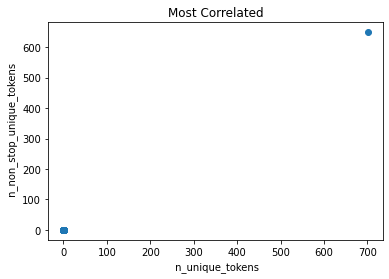

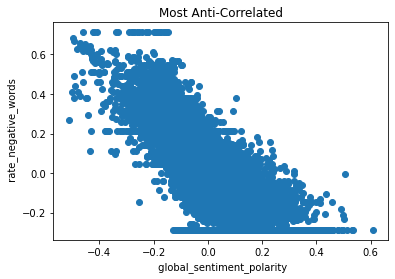

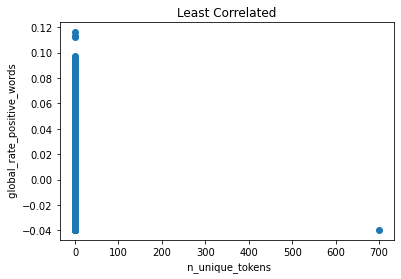

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue', 'red']

plt.scatter(xHat.iloc[:,maxColInd[0]],xHat.iloc[:,maxColInd[1]])
plt.title("Most Correlated")
plt.xlabel(maxCol[0])
plt.ylabel(maxCol[1])
plt.show()

plt.scatter(xHat.iloc[:,minColInd[0]],xHat.iloc[:,minColInd[1]])
plt.title("Most Anti-Correlated")
plt.xlabel(minCol[0])
plt.ylabel(minCol[1])
plt.show()

plt.scatter(xHat.iloc[:,leastColInd[0]],xHat.iloc[:,leastColInd[1]])
plt.title("Least Correlated")
plt.xlabel(leastCorrCol[0])
plt.ylabel(leastCorrCol[1])
plt.show()

We see that based on the scatter splots the most correlated attributes seem to have points on the same line  with a slope similar to 1 while the most anti correlated have points everywhere on multiple lines with very little coherence but a slope that seems to fit close to -1. However the least correlated are completely opposite of each other on two totally different lines altogether so it makes sense that their correlation is very small. These results are expected for the most part. It makes sense that n_unique_tokens is most correlated with n_non_stop_unique_tokens since they are both values for unique tokens (unique words). However it was unexpected that the rate of negative words was anti-correlated with global sentiment polarity since I would guess the rate of negative words would change sentiment of the document. Lastly I thought the unique tokens would be correlated with the global rate postive words since they are both concerning words within the news documents but that clearly is not the case.

# Change Of Basis


In [ ]:
from numpy import linalg as la
np.random.seed(42)
U = np.zeros((33,33))
first = np.random.random_sample((33,))
U0 = first/la.norm(first)
U[:,0] = U0;
for i in range(1,33):
  x = np.random.random_sample((33,))
  for j in range(0, i):
    proj = (np.dot(x.transpose(),U[:,j])/np.dot(U[:,j],U[:,j]))*U[:,j]
    x = x-proj
  ui = x/la.norm(x)
  U[:,i] = ui
Dprime = np.dot(data,U)
Dprime_means = np.mean(Dprime,axis=0)
Dprime_hat = Dprime - Dprime_means
dprimeNorm = 0
for i in Dprime_hat:
  dprimeNorm += np.dot(i.transpose(),i)
primeVariance = dprimeNorm/Dprime_hat.shape[0]
print("New Data Total Variance")
print(primeVariance)

New Data Total Variance
135404799.73772126


# Compare Variances
The new data total variance from the data set projected onto the orthogonal basis is the same as the total variance of the original data set: 135404799.73772126